In [1]:
!pip install sqlalchemy==1.3.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 104.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... one
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp312-cp312-linux_x86_64.whl size=1160111 sha256=a9d4af91534af29d84c9372d3ba4f898e034f6fdcfd9f3b88087a4223d9d8b1b
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/b3/1c/42/0e26b8d512adc6bce10ff71a05229366b4ccec641cd3b42111
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.37
    Uninstalling SQLAlchemy-2.0.37:
      Successfully uninstalled SQLAlchemy-2.0.37
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterhub 5.2.1 requires SQLAlchemy>=1.4.1, but you have sqlalchemy 1.3.9 which is incompatible.


In [2]:
!pip install ipython-sql
!pip install ipython-sql prettytable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [3]:
%load_ext sql

In [4]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [5]:
!pip install -q pandas

In [6]:
%sql sqlite:///my_data1.db

In [7]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [8]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [9]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [14]:
%sql PRAGMA table_info(SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Date,TEXT,0,None,0
1,Time (UTC),TEXT,0,None,0
2,Booster_Version,TEXT,0,None,0
3,Launch_Site,TEXT,0,None,0
4,Payload,TEXT,0,None,0
5,PAYLOAD_MASS__KG_,INT,0,None,0
6,Orbit,TEXT,0,None,0
7,Customer,TEXT,0,None,0
8,Mission_Outcome,TEXT,0,None,0
9,Landing_Outcome,TEXT,0,None,0


In [15]:
%sql SELECT DISTINCT "Launch Site" FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


"""Launch Site"""
Launch Site


In [17]:
%sql SELECT * FROM SPACEXTABLE WHERE "Launch Site" LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome


In [19]:
%sql SELECT SUM("Payload Mass (kg)") AS TotalPayloadMass FROM SPACEXTABLE WHERE Customer = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


TotalPayloadMass
0.0


In [13]:
%sql SELECT AVG(PayloadMass) AS AveragePayloadMass FROM SPACEXTABLE WHERE BoosterVersion = 'F9 v1.1';


 * sqlite:///my_data1.db
(sqlite3.OperationalError) no such column: PayloadMass
[SQL: SELECT AVG(PayloadMass) AS AveragePayloadMass FROM SPACEXTABLE WHERE BoosterVersion = 'F9 v1.1' ;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [21]:
%sql SELECT AVG("Payload Mass (kg)") AS AvgPayloadMass FROM SPACEXTABLE WHERE "Booster Version" = 'F9 v1.1';

 * sqlite:///my_data1.db
Done.


AvgPayloadMass
None


In [27]:
%sql SELECT MIN(Date) AS FirstSuccessDate FROM SPACEXTABLE WHERE Landing_Outcome LIKE '%Success%' AND Landing_Outcome LIKE '%ground pad%';


 * sqlite:///my_data1.db
Done.


FirstSuccessDate
2015-12-22


In [29]:
boosters = df[
    (df['Landing_Outcome'].str.contains('Success')) &
    (df['Landing_Outcome'].str.contains('drone ship')) &
    (df['PAYLOAD_MASS__KG_'] > 4000) &
    (df['PAYLOAD_MASS__KG_'] < 6000)
]['Booster_Version']

boosters


23       F9 FT B1022
27       F9 FT B1026
31    F9 FT  B1021.2
42    F9 FT  B1031.2
Name: Booster_Version, dtype: object

In [30]:
mission_counts = df['Mission_Outcome'].value_counts()
mission_counts


Mission_Outcome
Success                             98
Failure (in flight)                  1
Success (payload status unclear)     1
Success                              1
Name: count, dtype: int64

In [33]:
# Step 1: Find maximum payload mass
max_payload = df['PAYLOAD_MASS__KG_'].max()

# Step 2 & 3: Filter rows with maximum payload and get booster versions
boosters_max_payload = df[df['PAYLOAD_MASS__KG_'] == max_payload]['Booster_Version']

boosters_max_payload


74     F9 B5 B1048.4
77     F9 B5 B1049.4
79     F9 B5 B1051.3
80     F9 B5 B1056.4
82     F9 B5 B1048.5
83     F9 B5 B1051.4
85     F9 B5 B1049.5
92    F9 B5 B1060.2 
93    F9 B5 B1058.3 
94     F9 B5 B1051.6
95     F9 B5 B1060.3
99    F9 B5 B1049.7 
Name: Booster_Version, dtype: object

In [34]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Filter for year 2015 and failures on drone ship
filtered = df[
    (df['Year'] == 2015) &
    (df['Landing_Outcome'].str.contains('Failure')) &
    (df['Landing_Outcome'].str.contains('drone ship'))
][['Month', 'Landing_Outcome', 'Booster_Version', 'Launch_Site']]

filtered


,Month,Landing_Outcome,Booster_Version,Launch_Site
13,January,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
16,April,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Filter for the date range
filtered_df = df[(df['Date'] >= '2010-06-04') & (df['Date'] <= '2017-03-20')]

# Count landing outcomes and sort descending
landing_counts = filtered_df['Landing_Outcome'].value_counts().sort_values(ascending=False)
landing_counts


Landing_Outcome
No attempt                10
Failure (drone ship)       5
Success (drone ship)       5
Controlled (ocean)         3
Success (ground pad)       3
Failure (parachute)        2
Uncontrolled (ocean)       2
Precluded (drone ship)     1
Name: count, dtype: int64

In [8]:
print(landing_counts)

Landing_Outcome
No attempt                10
Failure (drone ship)       5
Success (drone ship)       5
Controlled (ocean)         3
Success (ground pad)       3
Failure (parachute)        2
Uncontrolled (ocean)       2
Precluded (drone ship)     1
Name: count, dtype: int64


In [10]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 137.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 158.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 177.2 MB/s eta 0:00:00


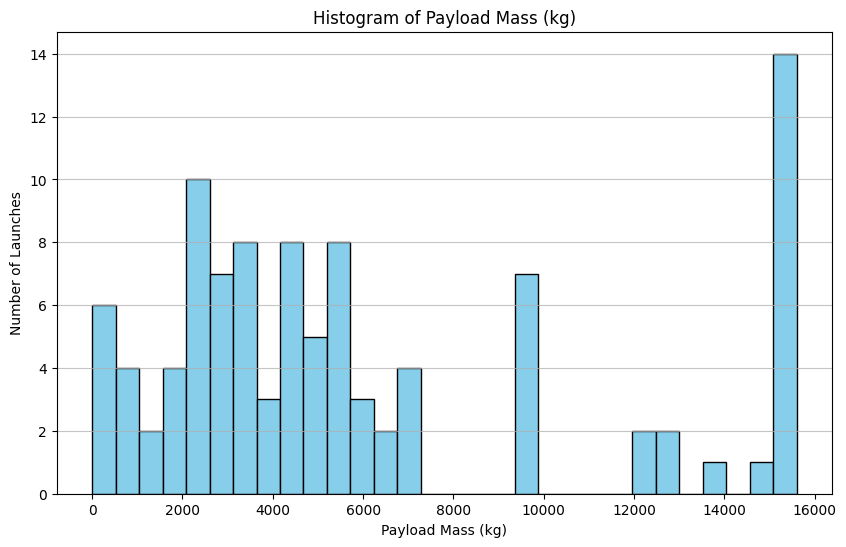

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")

# Convert payload mass to numeric (in case of missing or non-numeric values)
df['PAYLOAD_MASS__KG_'] = pd.to_numeric(df['PAYLOAD_MASS__KG_'], errors='coerce')

# Drop missing values for payload mass
payload_mass = df['PAYLOAD_MASS__KG_'].dropna()

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(payload_mass, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Payload Mass (kg)')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Number of Launches')
plt.grid(axis='y', alpha=0.75)
plt.show()
